# Analyze Imaging Mass Cytometry data

Apply Squidpy to Imaging Mass Cytometry data. These data comes from [Jackson et al. 2020](https://squidpy.readthedocs.io/en/stable/references.html#id9) and a pre-processed subset of the data is provided in `ann.AnnData` format.

## Import packages & data

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import squidpy as sq

print(f"squidpy=={sq.__version__}")

# Load the pre-processed dataset
adata = sq.datasets.imc()

squidpy==1.2.2


Visualize the cluster annotation in spatial context with `squidpy.pl.spatial_scatter()`.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


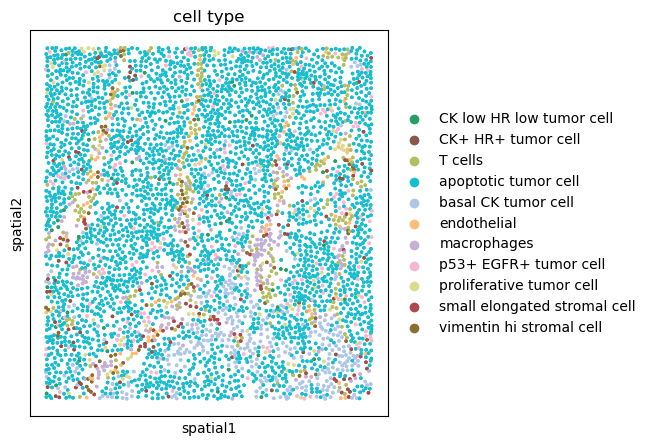

In [4]:
sq.pl.spatial_scatter(adata, shape=None, color="cell type", size=10)

Most of the tissue seems to consist of _apoptotic tumor cells_. There are also pther cell types scattered across the tissue, annotated as _T cells, Macrophages_, and different types of _Stromal cells_. There is also a subset of tumor cell, _basal CK tumor cell_ located in the lower part of the tissue.

### Co-occurance across spatial dimensions

Visualize cluster co-occurance in spatial dimensions using the original spatial coordinates.

Compute this score with `squidpy.gr.co_occurance()` and set the cluster annotation for the conditional probability with the argument `clusters`. Then, visualize the results with `squidpy.pl.co_occurance()`. Visualzize the results for two conditional groups, _CK tumor cell_ and _T cells_.

  0%|          | 0/1 [00:00<?, ?/s]

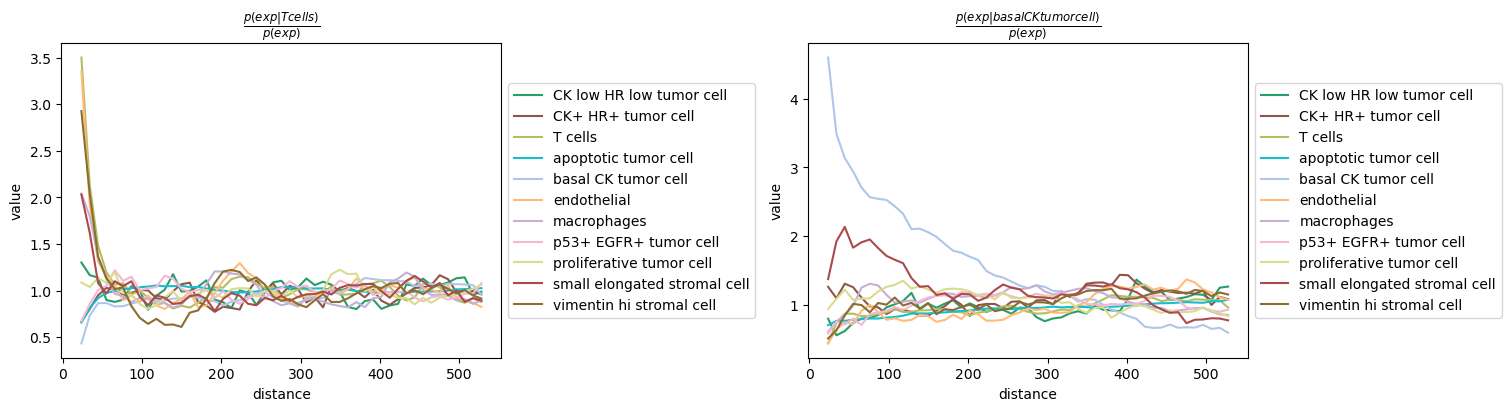

In [5]:
sq.gr.co_occurrence(adata, cluster_key="cell type")
sq.pl.co_occurrence(
    adata,
    cluster_key="cell type",
    clusters=["basal CK tumor cell", "T cells"],
    figsize=(15, 4),
)

_T cells_ seem to co-occur with _endothelial_ and _vimentin hi stromal cells_, whereas _basal CK tumor cells_ seem to largel cluster togetherm except for the presence of a type of stromal cells (_small elongatged stromal cells_) at close distance.

### Neighborhood enrichment

_Neighborhood enrichment test_, computed with `squidpy.gr.nhood_enrichment()`, is an enrichment score on spatial proximity of clusters. If spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as _enriched_. If they are far apart, the score will be low and they can be defined as _depleted_. This score is based on a permutation-test, and the number of permutations can be set with `n_perms` argument (default is 1000).

The function works on a connectivity matrix, which can be computed with `squidpy.gr.spatial_neighbors()`.

Lastly, visualize the results with `squidpy.pl.nhood_enrichment()`.

  0%|          | 0/1000 [00:00<?, ?/s]

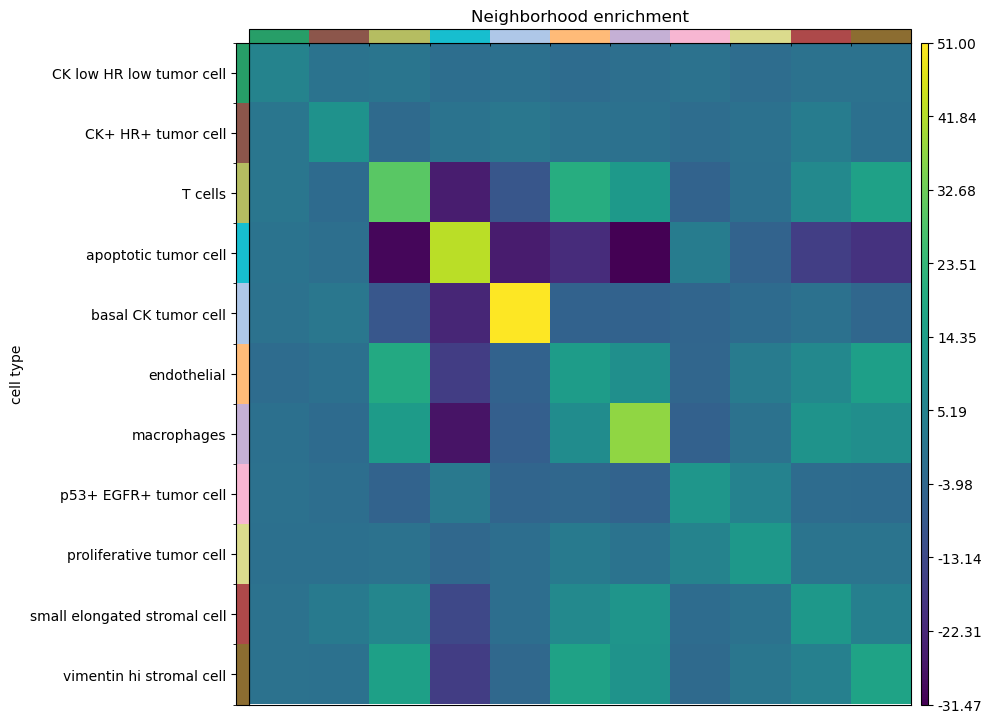

In [6]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cell type")
sq.pl.nhood_enrichment(adata, cluster_key="cell type")

_T cells_ show enrichment with _stromal_ and _endothelial cells_, as well as _macrophages_. _Apoptotic tumor cells_, being uniformly spread across the tissue area, show a neighbor depletion against any other cluster (but a strong enrichment for itself). 

### Interaction matrix and network centralitie

Squidpy provides other descriptive statistics of the spatial graph. The interaction matrix, counts the number of edges that each cluster stare with all the others. This score can be computed with `squidpy.gr.interaction_matrix()` and the results visualized with `squidpy.pl.interaction_matrix()`.

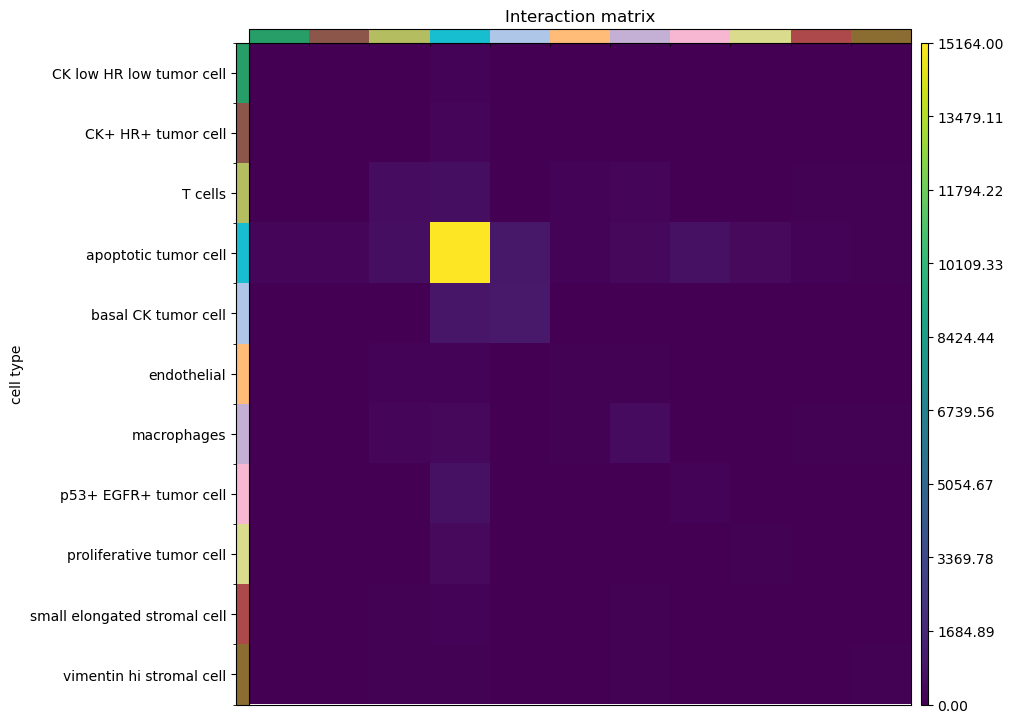

In [7]:
sq.gr.interaction_matrix(adata, cluster_key="cell type")
sq.pl.interaction_matrix(adata, cluster_key="cell type")

Investigate properties of the spatial graph by computing different network centralities:
    -degree_centrality
    -average_clustering
    -closeness_centrality
   
Squidpy provides a convenient function for all of them: `squidpy.gr.centrality_scores()` and `squidpy.pl.centrality_scores()` for visualization.

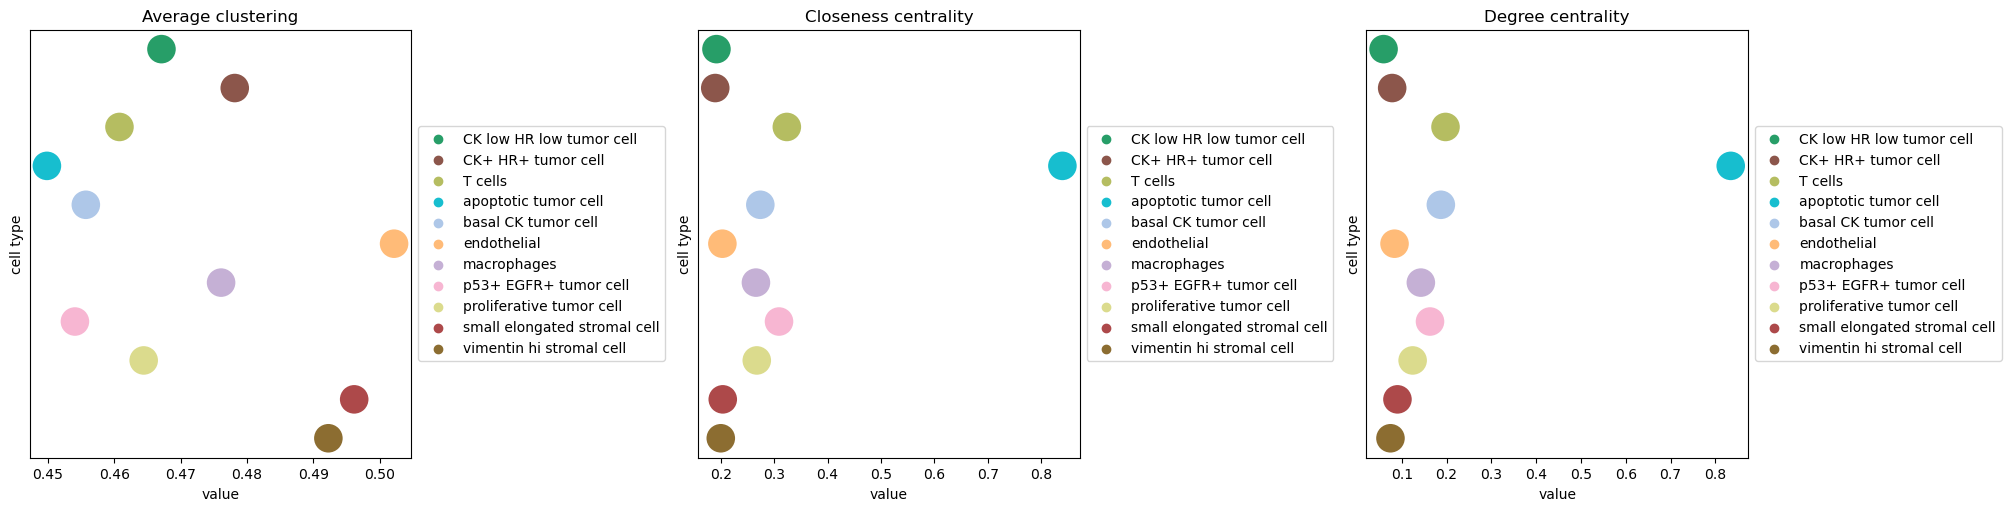

In [8]:
sq.gr.centrality_scores(
    adata,
    cluster_key="cell type",
)
sq.pl.centrality_scores(adata, cluster_key="cell type", figsize=(20, 5), s=500)

_Apoptotic tumor cells_ shows high closeness centrality, indicating that nodes belonging to that group are often close to each other in the spatial graph.